## Initial modeling testing
Initial code for some testing of preliminary versions of model 2, the model which takes in the realized (or later on predicted) stats for a game and outputs a prediction of the score for each team.

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import Ridge


Load in the games data and then split it into train and test sets:

In [2]:
games_df = pd.read_csv("clean_games_data.csv", index_col=0)
games_df.reset_index(drop=True, inplace=True)
games_df.head()

,school,home,school_id,points,fumblesRecovered,rushingTDs,puntReturnYards,puntReturnTDs,puntReturns,passingTDs,...,qbHurries,passesDeflected,passAttempts,passAccuracy,penaltyYards,penalties,thirdDowns,thirdDownPercentage,fourthDowns,fourthDownPercentage
0,Vanderbilt,0,238,7,2.0,0.0,26.0,0.0,5.0,0.0,...,NaN,NaN,34,0.470588,66,7,14,0.214286,1,0.00
1,Temple,1,218,37,4.0,1.0,6.0,0.0,2.0,2.0,...,NaN,NaN,36,0.638889,23,3,17,0.117647,4,0.50
2,BYU,1,252,35,1.0,2.0,24.0,0.0,2.0,3.0,...,NaN,NaN,36,0.777778,150,15,13,0.384615,1,1.00
3,Connecticut,0,41,10,2.0,1.0,-1.0,0.0,1.0,0.0,...,NaN,NaN,48,0.520833,90,8,17,0.470588,4,0.25
4,Penn State,1,213,26,1.0,1.0,9.0,0.0,2.0,1.0,...,NaN,NaN,47,0.680851,90,9,18,0.555556,2,0.50


Removing features which are not going to go into the model

In [3]:
rid = ["school", "school_id", "thirdDownEff", "fourthDownEff", "totalPenaltiesYards", "year", "week", "completionAttempts", "possessionTime"]
games_df.drop(rid, axis=1, inplace=True)

In [4]:
train_density = 0.8
games_ids = set(games_df["id"])
train_ids = random.sample(list(games_ids), int(train_density*len(games_ids)))
test_ids = list(games_ids - set(train_ids))

Extract the games to put into the train and test sets

In [5]:
test_games_df = games_df[games_df["id"].isin(test_ids)]
train_games_df = games_df[games_df["id"].isin(train_ids)]
train_games_df.head()

,home,points,fumblesRecovered,rushingTDs,puntReturnYards,puntReturnTDs,puntReturns,passingTDs,kickReturnYards,kickReturnTDs,...,qbHurries,passesDeflected,passAttempts,passAccuracy,penaltyYards,penalties,thirdDowns,thirdDownPercentage,fourthDowns,fourthDownPercentage
0,0,7,2.0,0.0,26.0,0.0,5.0,0.0,150.0,0.0,...,NaN,NaN,34,0.470588,66,7,14,0.214286,1,0.00
1,1,37,4.0,1.0,6.0,0.0,2.0,2.0,48.0,0.0,...,NaN,NaN,36,0.638889,23,3,17,0.117647,4,0.50
2,1,35,1.0,2.0,24.0,0.0,2.0,3.0,45.0,0.0,...,NaN,NaN,36,0.777778,150,15,13,0.384615,1,1.00
3,0,10,2.0,1.0,-1.0,0.0,1.0,0.0,114.0,0.0,...,NaN,NaN,48,0.520833,90,8,17,0.470588,4,0.25
6,0,52,1.0,3.0,28.0,0.0,4.0,4.0,36.0,0.0,...,NaN,NaN,46,0.717391,72,8,8,0.250000,1,1.00


In [ ]:
test_games_df.dropna(axis=1, inplace=True)
train_games_df.dropna(axis=1, inplace=True)
train_games_df.head()

In [7]:
test_games_df.keys()

Index(['home', 'points', 'fumblesRecovered', 'rushingTDs', 'passingTDs',
       'firstDowns', 'totalYards', 'netPassingYards', 'yardsPerPass',
       'rushingYards', 'rushingAttempts', 'yardsPerRushAttempt', 'turnovers',
       'fumblesLost', 'interceptions', 'id', 'passAttempts', 'passAccuracy',
       'penaltyYards', 'penalties', 'thirdDowns', 'thirdDownPercentage',
       'fourthDowns', 'fourthDownPercentage'],
      dtype='object')

In [8]:
X_train = []
y_train = []   

In [ ]:
X_train = []
y_train = []
for id in train_ids:
    temp = train_games_df.loc[train_games_df["id"] == id]
    temp_home = temp.loc[temp["home"] == 1]
    temp_away = temp.loc[temp["home"] == 0]
    y_train.append(np.array([temp_home["points"], temp_away["points"]]))
    temp_home.drop(["home", "points", "id"], axis=1, inplace=True)
    temp_away.drop(["home", "points", "id"], axis=1, inplace=True)

    temp_home = temp_home.to_numpy()
    temp_away = temp_away.to_numpy()
    X_train.append(np.concatenate([temp_home, temp_away], axis=1)[0])

X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 2)

In [ ]:
X_test = []
y_test = []
for id in test_ids:
    temp = test_games_df.loc[test_games_df["id"] == id]
    temp_home = temp.loc[temp["home"] == 1]
    temp_away = temp.loc[temp["home"] == 0]
    y_test.append(np.array([temp_home["points"], temp_away["points"]]))
    temp_home.drop(["home", "points", "id"], axis=1, inplace=True)
    temp_away.drop(["home", "points", "id"], axis=1, inplace=True)

    temp_home = temp_home.to_numpy()
    temp_away = temp_away.to_numpy()
    X_test.append(np.concatenate([temp_home, temp_away], axis=1)[0])

X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 2)

Now we have the train and test data, we will scale the input to the model.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We now try Ridge regression with multiple alpha values

In [14]:
reg50 = Ridge(alpha=0.5)
reg50.fit(X_train_scaled, y_train)

reg25 = Ridge(alpha=0.25)
reg25.fit(X_train_scaled, y_train)

reg100 = Ridge(alpha=1)
reg100.fit(X_train_scaled, y_train)

Ridge(alpha=1)

We now make predictions with the three models on the test set and compute the mean absolute error. This metric is chosen because it tells us the average which each individual predicted score was off, which is the desired error to consider in the context of our problem.

In [16]:
from sklearn.metrics import mean_absolute_error

pred_scores25 = reg25.predict(X_test_scaled)
pred_scores50 = reg50.predict(X_test_scaled)
pred_scores100 = reg100.predict(X_test_scaled)

print(f"alpha: MAE are \n 0.25:{mean_absolute_error(pred_scores25, y_test)} \n 0.50:{mean_absolute_error(pred_scores50, y_test)} \n 1.00:{mean_absolute_error(pred_scores100, y_test)}")

alpha: MAE are 
 0.25:3.0261386703903215 
 0.50:3.0261482672430873 
 1.00:3.0261614121716405


We are seeing that the weight term in Ridge regression seems to have minimal impact on the performance of the model. We try a couple other basic models:

In [26]:
from sklearn.linear_model import Lasso, ElasticNet

lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

ela_net = ElasticNet(alpha=1)
ela_net.fit(X_train_scaled, y_train)

print(f"MAE are Lasso:{mean_absolute_error(lasso.predict(X_test_scaled), y_test)}, ElasticNet:{mean_absolute_error(ela_net.predict(X_test_scaled), y_test)}")

MAE are Lasso:3.574690479879532, ElasticNet:4.373814267228159


Interestingly, with some tests we found that as we increase the alpha parameter, performance goes down overall. This suggests that keeping all variables under consideration is nontrivially helping performance in the model. 

In [48]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

print(f"MAE with linear regression:{mean_absolute_error(linreg.predict(X_test_scaled), y_test)}")

MAE with linear regression:3.026167860418286


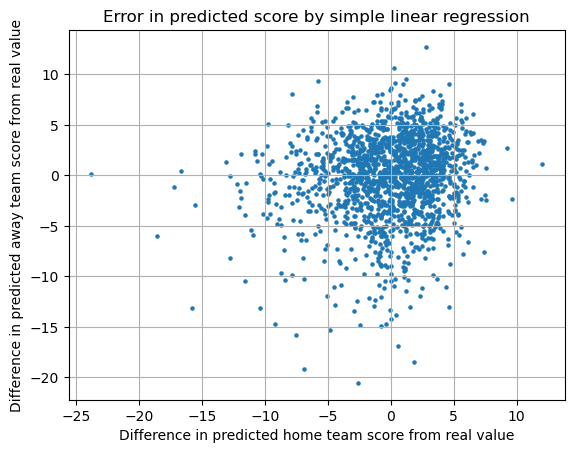

In [47]:
import matplotlib.pyplot as plt

y_pred = linreg.predict(X_test_scaled)
y_real = np.array(y_test)

diff = y_pred - y_real

plt.figure()
#plt.scatter(y_pred[:,0], y_pred[:,1], color='r')
plt.scatter(diff[:, 0], diff[:, 1], marker='o', s=5)
plt.title("Error in predicted score by simple linear regression")
plt.xlabel("Difference in predicted home team score from real value")
plt.ylabel("Difference in predicted away team score from real value")
plt.grid()
plt.show()

In [46]:
print(f"home error:{mean_absolute_error(y_pred[:, 0], y_real[:, 0])}, and away error:{mean_absolute_error(y_pred[:, 1], y_real[:, 1])}")

home error:2.8881012799919326, and away error:3.1642344408446377


It is interesting to note that the home predictions are closer than the away predictions, on average by about 10%. This is something to keep track of as we add in more date and use more intricate models. It also may be interesting to look at outliers, such as the game where the away team prediction was dead-on but the home team prediction was off by ~24 points.